# Workshop 4

Starter code for workshop 4. You should have seen most of it before, but make sure you understand what it is doing!

In [1]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To plot even prettier figures
import seaborn as sn

# General data handling (pure numerics are better in numpy)
import pandas as pd

In [2]:
# Load the dataset

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
# This is where the numerical data is
xarray = data.data
yarray = data.target

In [32]:
# This is where the names of features and targets are
print('Features names are:', data.feature_names)
print('Label names are: ', data.target_names)

Features names are: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Label names are:  ['malignant' 'benign']


In [8]:
# We recommend inverting the labels so that malignant (the worse disease) = 1 (positive class)
yarray = 1 - yarray
# Don't forget to switch the label names too (if you are going to use them anywhere)
# Though it is good practice to switch them here anyway, as future modifications to the code then won't get confused

In [10]:
# This is how you could put it all into a pandas dataframe (useful for some investigations)
fullarray = np.concatenate((xarray,np.reshape(yarray,(-1,1))),axis=1)
df = pd.DataFrame(fullarray, columns = list(data.feature_names) + ['target'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1.0


# Splitting into separate datasets

In [11]:
from sklearn.model_selection import train_test_split

bigtrain_set,test_set = train_test_split(df,test_size=0.2, random_state = 20)
train_set, val_set = train_test_split(bigtrain_set, test_size=0.2, random_state=20)

X_train = train_set.iloc[:,:-1]
y_train = train_set.iloc[:,-1]
X_test = test_set.iloc[:,:-1]
y_test = test_set.iloc[:,-1]
X_val = val_set.iloc[:,:-1]
y_val = val_set.iloc[:,-1]
print([X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape])

[(364, 30), (364,), (114, 30), (114,), (91, 30), (91,)]


# Pipeline

In [12]:
# Your code here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Replace missing features with median, and scale to std distribution
preproc_pl = Pipeline([('imputer', SimpleImputer(strategy="median")), 
                          ('stdscaler', StandardScaler())])

# SGD Classifier

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_pl = Pipeline([ ('preproc',preproc_pl), ('sgd',SGDClassifier(loss='log'))])

sgd_pl.fit(X_train,y_train)
y_val_pred = sgd_pl.predict(X_val)
y_val_prob = sgd_pl.predict_proba(X_val)

c:\Users\gbhoa\anaconda3\envs\uml_env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [21]:
y_val_prob

array([[1.94421814e-06, 9.99998056e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.60172464e-67],
       [8.43713799e-09, 9.99999992e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.50215138e-50],
       [1.00000000e+00, 1.09845904e-46],
       [1.00000000e+00, 6.50381101e-44],
       [1.00000000e+00, 3.24011046e-17],
       [1.00000000e+00, 9.41526549e-36],
       [1.00000000e+00, 3.48031718e-36],
       [1.00000000e+00, 3.13685499e-53],
       [1.00000000e+00, 1.47407537e-31],
       [1.00000000e+00, 9.56390834e-48],
       [8.55243175e-01, 1.44756825e-01],
       [1.00000000e+00, 1.68341594e-26],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.23129002e-58],
       [1.00000000e+00, 1.16502621e-21],
       [7.06050773e-11, 1.00000000e+00],
       [1.00000000e+00, 3.59631633e-20],
       [1.00000000e+00, 1.48523029e-32],
       [0.00000000e+00, 1.00000000e+00],
       [1.000000

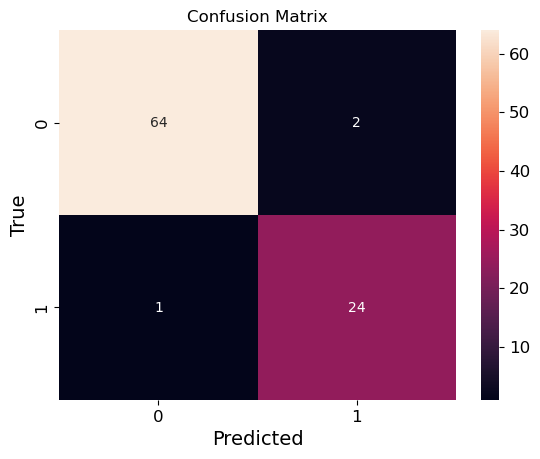

In [15]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_true=y_val, y_pred=y_val_pred)
sn.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

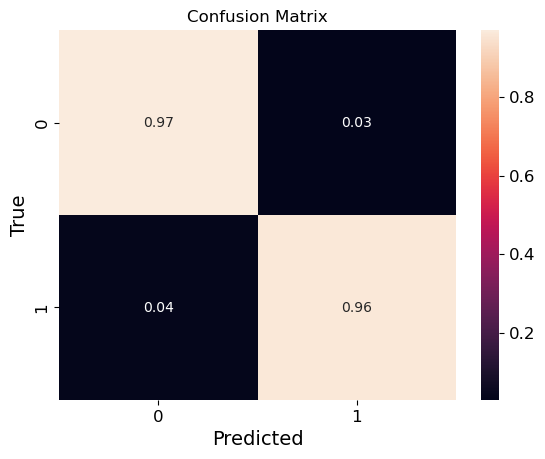

In [19]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_true=y_val, y_pred=y_val_pred, normalize='true')
sn.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# True Positives = 24
# True Negatives = 64
# False Positive = 2 those points that you are predicting as positive but in reality are negative
# False Negative = 1 those points that you are pedicting as negative but in reality are positive

In [16]:
# Now we can calculate the accuracy of our model
from sklearn.metrics import accuracy_score

sgd_acc = accuracy_score(y_true = y_val, y_pred = y_val_pred)
print('Accuracy for SGD is ', sgd_acc)

Accuracy for SGD is  0.967032967032967


In [17]:
# Also we can precision and recall
from sklearn.metrics import precision_score, recall_score

prec = precision_score(y_true = y_val, y_pred = y_val_pred) # TP / (TP+ FP): Proportion of true positive predictions to the total number of positive predictions made by the model. 
recl = recall_score(y_true = y_val, y_pred = y_val_pred) # TP / (TP + FN): Proportion of true positive predictions to the total number of actual positive cases in the dataset
print('Precision & Recall are ', prec, ' and ', recl)

Precision & Recall are  0.9230769230769231  and  0.96


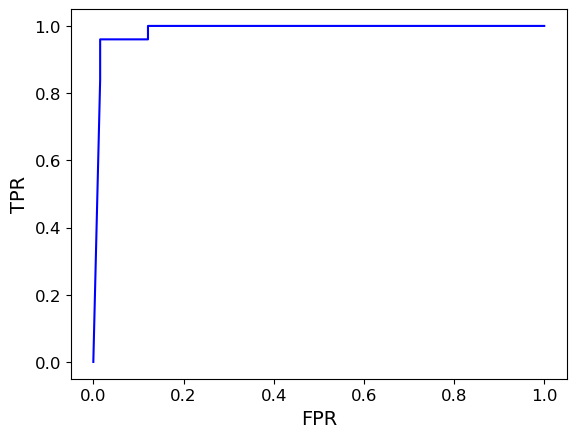

In [20]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val, y_val_prob[:,1], pos_label=1) # You need to use the prob to estimate positive class
plt.plot(fpr,tpr,'b')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [43]:
auc_sgd = auc(fpr,tpr)
print('AUC for SGD classifier is ', auc_sgd)

AUC for SGD classifier is  0.9921212121212121


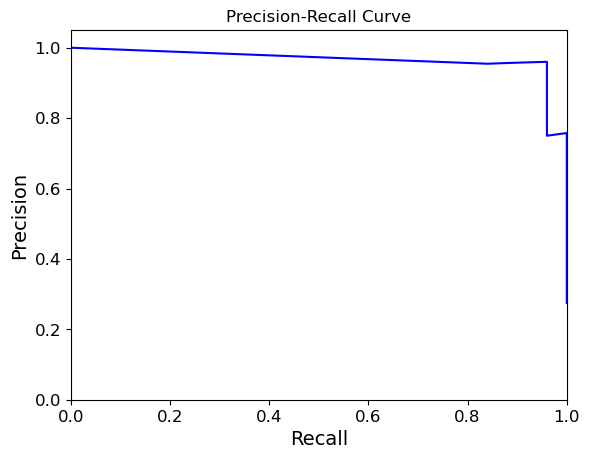

In [22]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_true=y_val, probas_pred=y_val_prob[:,1])

plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()